# Mall Customers Clustering project

**The dataset contains details of customers from a mall which contains their unique CustomerID, gender, age, annual Income and spending Score. Based on the data given, this project involves clustering of the dataset into various clusters on the bases of their income and spending scores.**

## Importing the necessary libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [106]:
email_data = pd.read_csv('Mall_Customers.csv')

In [107]:
email_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring the dataset

#### Male v/s female spending score

In [108]:
email_data.shape

(200, 5)

In [109]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [110]:
email_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As clearly visible, data is perfect with all columns having some valid values with no outliers.

Now we can move to the Exploratory data analysis and algorithm to model the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


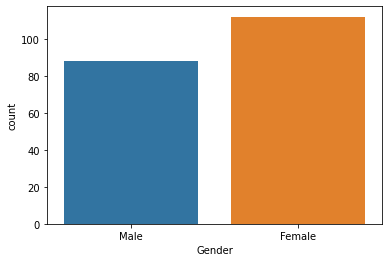

In [111]:
sns.countplot(email_data.Gender)

In [112]:
email_data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [113]:
print(email_data[email_data['Gender'] == 'Male']['Annual Income (k$)'].mean())
print(email_data[email_data['Gender'] == 'Female']['Annual Income (k$)'].mean())

62.22727272727273
59.25


In [114]:
male_spending_score = email_data[email_data['Gender'] == 'Male']['Spending Score (1-100)'].mean()
female_spending_score = email_data[email_data['Gender'] == 'Female']['Spending Score (1-100)'].mean()

male_spending_score, female_spending_score

(48.51136363636363, 51.526785714285715)

<BarContainer object of 2 artists>

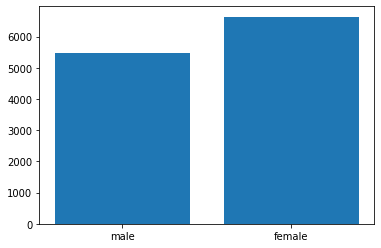

In [115]:
gender_income = {}

gender_income['male'] = email_data[email_data['Gender'] == 'Male']['Annual Income (k$)'].sum()
gender_income['female'] = email_data[email_data['Gender'] == 'Female']['Annual Income (k$)'].sum()

plt.bar(gender_income.keys(), gender_income.values())

<BarContainer object of 2 artists>

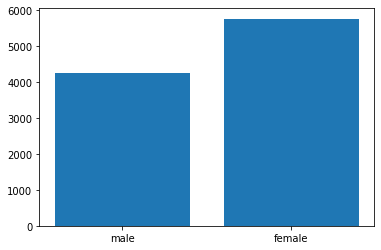

In [116]:
gender_spending = {}

gender_spending['male'] = email_data[email_data['Gender'] == 'Male']['Spending Score (1-100)'].sum()
gender_spending['female'] = email_data[email_data['Gender'] == 'Female']['Spending Score (1-100)'].sum()

plt.bar(gender_spending.keys(), gender_spending.values())

### Although graph shows higher income for females than males, on average, mens earn more. 88 males v/s 112 females

#### Annual Income v/s Spending Score

In [117]:
email_data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [118]:
email_data[email_data['Annual Income (k$)'] > 78]['Spending Score (1-100)'].mean()

50.975

In [119]:
email_data[email_data['Annual Income (k$)'] > 78]['Spending Score (1-100)'].describe()

count    40.000000
mean     50.975000
std      32.862173
min       5.000000
25%      17.750000
50%      51.000000
75%      83.500000
max      97.000000
Name: Spending Score (1-100), dtype: float64

In [120]:
email_data[email_data['Annual Income (k$)'] < 78]['Spending Score (1-100)'].mean()

50.2027027027027

In [121]:
email_data[email_data['Annual Income (k$)'] < 78]['Spending Score (1-100)'].describe()

count    148.000000
mean      50.202703
std       22.627705
min        3.000000
25%       40.750000
50%       50.000000
75%       60.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

## Spending based on Age

In [122]:
email_data.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


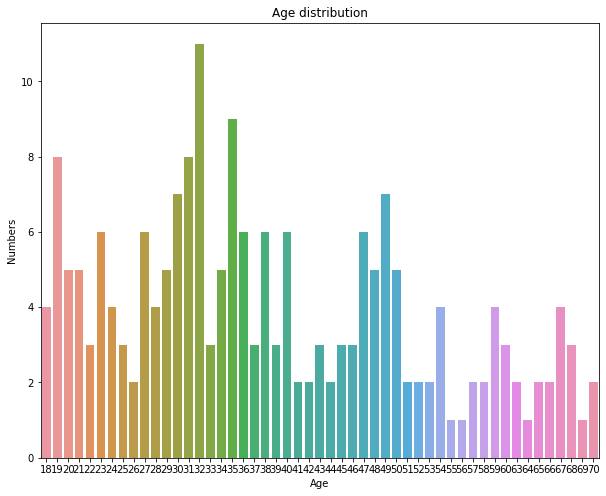

In [123]:
plt.figure(figsize=(10, 8))
sns.countplot(email_data.Age)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Numbers");

#### Getting the average of income and spending for all age groups and plotting based on age

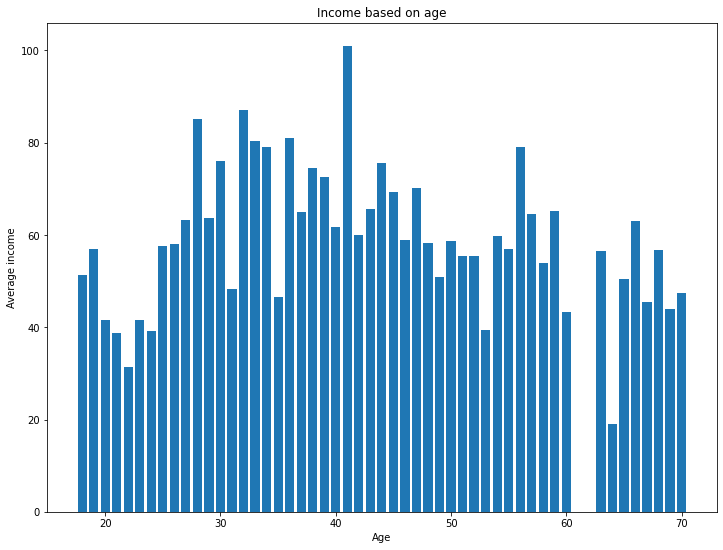

In [124]:
avg_age = set()
for i in email_data.Age:
    avg_age.add(i)
    
avg_income = {}
for age in avg_age:
    avg_income[age] = email_data[email_data.Age == age]['Annual Income (k$)'].mean()

plt.figure(figsize=(12, 9))
plt.bar(avg_income.keys(), avg_income.values())
plt.title("Income based on age")
plt.xlabel("Age")
plt.ylabel("Average income");

#### So, people of age group 41 earns the most

## Spending on the basis of age

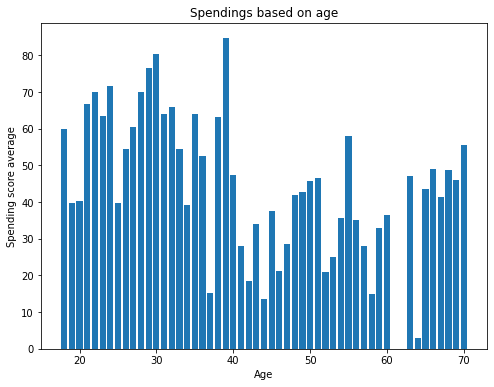

In [125]:
avg_spending = {}
for age in avg_age:
    avg_spending[age] = email_data[email_data.Age == age]['Spending Score (1-100)'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_spending.keys(), avg_spending.values())
plt.title("Spendings based on age")
plt.xlabel("Age")
plt.ylabel("Spending score average");

#### So, maximum spending is done by peoples of age 39

## Age groups divisions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


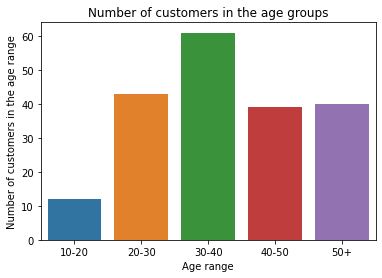

In [126]:
age_10_20 = email_data[email_data.Age < 20]
age_20_30 = email_data[(email_data.Age >= 20) & (email_data.Age < 30)]
age_30_40 = email_data[(email_data.Age >= 30) & (email_data.Age < 40)]
age_40_50 = email_data[(email_data.Age >= 40) & (email_data.Age < 50)]
age_50_plus = email_data[email_data.Age > 50]

ages = ['10-20', '20-30', '30-40', '40-50', '50+']
persons = [len(age_10_20), len(age_20_30), len(age_30_40), len(age_40_50), len(age_50_plus)]

sns.barplot(ages, persons)
plt.xlabel("Age range")
plt.ylabel("Number of customers in the age range")
plt.title("Number of customers in the age groups");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


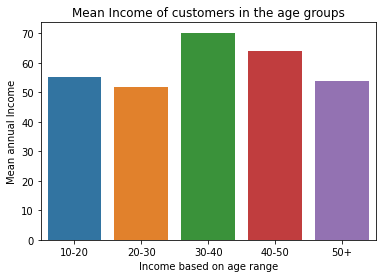

In [127]:
incomes = [age_10_20['Annual Income (k$)'].mean(), age_20_30['Annual Income (k$)'].mean(), age_30_40['Annual Income (k$)'].mean(), age_40_50['Annual Income (k$)'].mean(), age_50_plus['Annual Income (k$)'].mean()]

sns.barplot(ages, incomes)
plt.xlabel("Income based on age range")
plt.ylabel("Mean annual Income")
plt.title("Mean Income of customers in the age groups");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


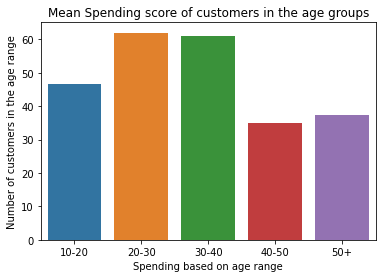

In [128]:
spendings = [age_10_20['Spending Score (1-100)'].mean(), age_20_30['Spending Score (1-100)'].mean(), age_30_40['Spending Score (1-100)'].mean(), age_40_50['Spending Score (1-100)'].mean(), age_50_plus['Spending Score (1-100)'].mean()]

sns.barplot(ages, spendings)
plt.xlabel("Spending based on age range")
plt.ylabel("Number of customers in the age range")
plt.title("Mean Spending score of customers in the age groups");

#### So, Maximum Spending is done by people of age group between 20-30 and 30-40, followed by age group <20, then > 50 and least earning is by people of age 40-50

In [129]:
email_data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


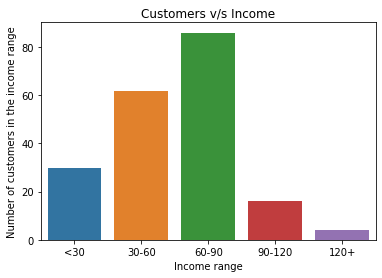

In [130]:
inc_30 = email_data[email_data['Annual Income (k$)'] < 30]
inc_30_60 = email_data[(email_data['Annual Income (k$)'] >= 30) & (email_data['Annual Income (k$)'] < 60)]
inc_60_90 = email_data[(email_data['Annual Income (k$)'] >= 60) & (email_data['Annual Income (k$)'] < 90)]
inc_90_120 = email_data[(email_data['Annual Income (k$)'] >= 90) & (email_data['Annual Income (k$)'] < 120)]
inc_120_plus = email_data[email_data['Annual Income (k$)'] > 120]

a_incomes = ['<30', '30-60', '60-90', '90-120', '120+']
persons = [len(inc_30), len(inc_30_60), len(inc_60_90), len(inc_90_120), len(inc_120_plus)]

sns.barplot(a_incomes, persons)
plt.xlabel("Income range")
plt.ylabel("Number of customers in the income range")
plt.title("Customers v/s Income");

In [131]:
email_data.drop(['CustomerID'], axis=1, inplace=True)
email_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


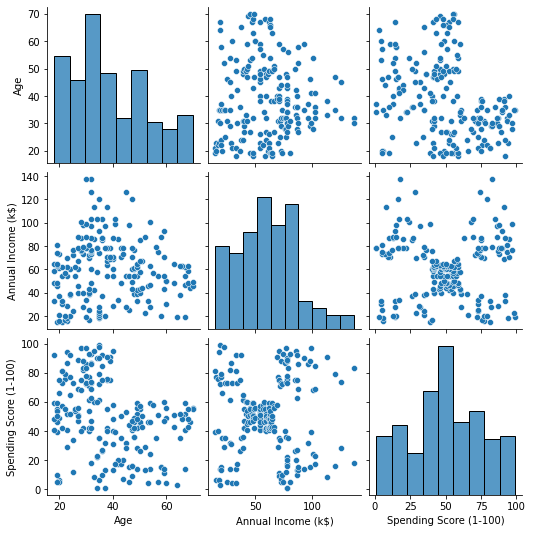

In [132]:
sns.pairplot(email_data)

**Clustering will be mainly done for 'Annual Income (k$)' v/s 'Spending Score(1-100)' as other scatter plots do not give so much infos and clusters.**

# Feature Engineering

#### STEP 1 - (ENCODING)

In [133]:
data = pd.get_dummies(email_data['Gender'])
data.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [134]:
email_data = pd.concat([email_data, data], axis=1)
email_data.drop(['Gender'], axis=1, inplace=True)
email_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [135]:
email_data.shape

(200, 5)

#### STEP-2 (SCALING)

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaled_data = scaler.fit_transform(email_data)
scaled_data.shape

(200, 5)

# Clustering

In [139]:
from sklearn.cluster import KMeans

**Accounting for spending and income columns**

In [140]:
imp_data = email_data[['Spending Score (1-100)', 'Annual Income (k$)']]
imp_data.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


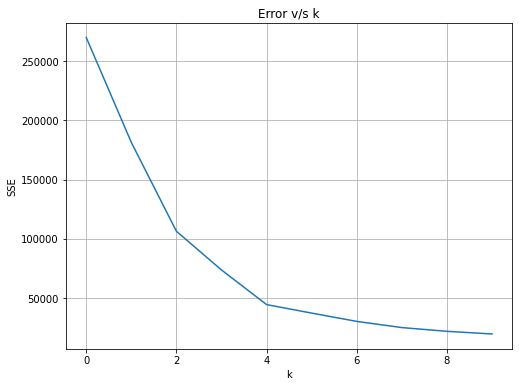

In [141]:
SSE = []

for k in range(1, 11):
  model = KMeans(k)
  model.fit(imp_data)
  SSE.append(model.inertia_)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Error v/s k");

From the graph, elbow is observed at k=5. So, we will use k=4 for 4 clustering.

In [148]:
model = KMeans(n_clusters=5)
model.fit(imp_data)

KMeans(n_clusters=5)

In [149]:
model.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

In [150]:
model.inertia_

44448.4554479337

In [151]:
model.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

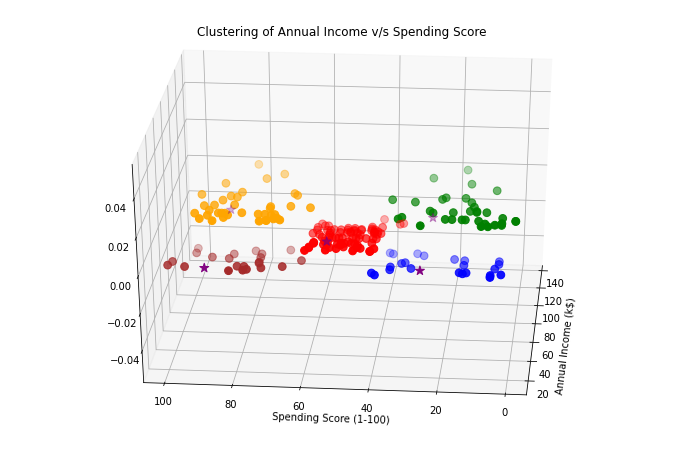

In [152]:
email_data['label'] = model.labels_

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(email_data[email_data.label == 0]['Annual Income (k$)'], email_data[email_data.label == 0]['Spending Score (1-100)'], c='red', s=60)
ax.scatter(email_data[email_data.label == 1]['Annual Income (k$)'], email_data[email_data.label == 1]['Spending Score (1-100)'], c='green', s=60)
ax.scatter(email_data[email_data.label == 2]['Annual Income (k$)'], email_data[email_data.label == 2]['Spending Score (1-100)'], c='orange', s=60)
ax.scatter(email_data[email_data.label == 3]['Annual Income (k$)'], email_data[email_data.label == 3]['Spending Score (1-100)'], c='blue', s=60)
ax.scatter(email_data[email_data.label == 4]['Annual Income (k$)'], email_data[email_data.label == 4]['Spending Score (1-100)'], c='brown', s=60)

ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='*', color='purple', s=90)

ax.view_init(30, 185)

plt.title("Clustering of Annual Income v/s Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)");